In [58]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch

In [59]:
random_layer = nn.Linear(512, 512)

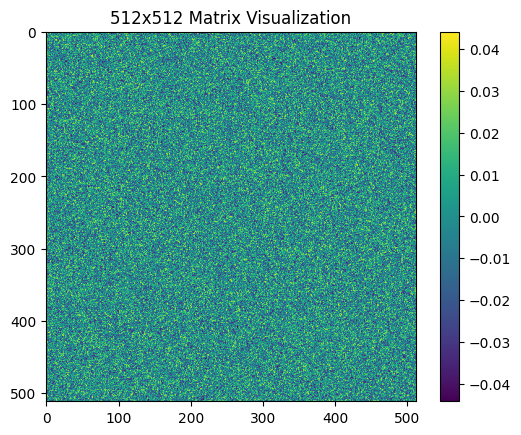

In [60]:
# Generate a 512x512 matrix with random values for demonstration purposes
matrix = random_layer.weight.detach().numpy()

# Use imshow to visualize the matrix
plt.imshow(matrix, cmap='viridis')  # You can change the colormap (cmap) as needed
plt.colorbar()  # Display the color scale
plt.title('512x512 Matrix Visualization')
plt.show()


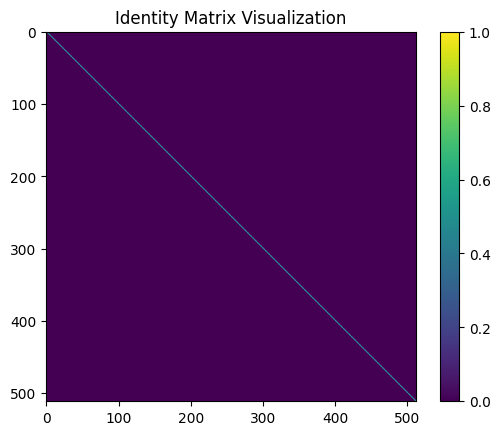

In [61]:
identity_lienar = nn.Linear(512, 512)
identity_lienar.weight.data = torch.eye(512)
identity_matrix = identity_lienar.weight.detach().numpy()
plt.imshow(identity_matrix, cmap='viridis')
plt.colorbar()
plt.title('Identity Matrix Visualization') 
plt.show()

In [63]:
from stable_baselines3.common

In [65]:
data, params, pytorch_variables = load_from_zip_file(final_load_path)

In [74]:
weigths = params["policy"]["features_extractor.net2deeper_network.sequential_container.14.weight"]

tensor([[ 1.0278e+00,  1.5491e-02, -2.0704e-02,  ...,  1.8897e-02,
          1.4422e-02,  4.7575e-03],
        [-2.8614e-02,  1.0155e+00,  9.9124e-03,  ..., -7.2671e-03,
          4.4375e-03, -8.2295e-03],
        [-5.8209e-02, -1.0539e-02,  9.8894e-01,  ..., -1.4926e-02,
         -2.5075e-04, -2.6246e-02],
        ...,
        [-1.0641e-02,  3.3560e-03, -2.0339e-02,  ...,  1.0283e+00,
          1.7155e-02, -2.3556e-02],
        [-3.5895e-02,  2.1690e-02, -1.7398e-02,  ..., -4.1350e-03,
          1.0027e+00, -4.2717e-02],
        [-1.7376e-02, -5.2710e-03,  7.7032e-03,  ...,  7.7824e-03,
          1.1108e-02,  1.0134e+00]])